In [1]:
%ls

01.ML intro.ipynb
02. Split data .ipynb
03. titanic.ipynb
04. encoder and scaler .ipynb
05. wine using decision tree.ipynb
07. pipeline.ipynb
08. cross validaion.ipynb
09. ROC curve.ipynb
10. math function.ipynb
11. box plot.ipynb
12. regression .ipynb
13. stats_regression .ipynb
14. cost function .ipynb
15. logistic regression .ipynb
16. precision and recall .ipynb
17.HAR.ipynb
18. boosting algorithm.ipynb
19. knn.ipynb
20. GBM, XGBoost, LGBM.ipynb
21. Fraud detection.ipynb
data/
ex.ipynb
머신러닝 과제/


In [1]:
import pandas as pd

data_path = "./data/creditcard.csv"
raw_data = pd.read_csv(data_path)
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


- class가 0이면 정상 고객, 1이면 사기 데이터이다

In [2]:
raw_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [3]:
frauds_rate = round(raw_data['Class'].value_counts()[1]/len(raw_data)*100, 2)
print('Frauds', frauds_rate, '% of the dataset')

Frauds 0.17 % of the dataset


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

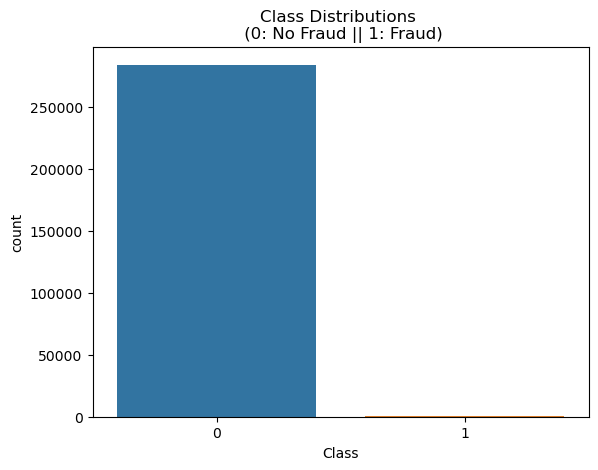

In [5]:
sns.countplot(x='Class', data=raw_data)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)')
plt.show();

In [6]:
raw_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
X = raw_data.iloc[:, 1:-1] # v1 ~ amount
y = raw_data.iloc[:, -1]

X.shape, y.shape

((284807, 29), (284807,))

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13, stratify=y) # 데이터의 불균형이 심하기 때문에 stratify가 중요하다

In [9]:
import numpy as np

np.unique(y_train, return_counts=True)

(array([0, 1]), array([199020,    344]))

In [10]:
print('Frauds rate of y_train : ' ,np.unique(y_train, return_counts=True)[1][1] / len(y_train) * 100, '%')

Frauds rate of y_train :  0.17254870488152324 %


- 먼저 분류기의 성능을 return하는 함수 하나 작성

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    re = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)

    return acc, pre, re, f1, auc

- 또 성능을 출력하는 함수 하나 작성

In [12]:
from sklearn.metrics import confusion_matrix

def print_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    acc, pre, re, f1, auc = get_clf_eval(y_test, pred)

    print('==> Confusion matrix')
    print(confusion)
    print('======================')

    print('Accuracy : {0:.4f}, Precision : {1:.4f}'.format(acc, pre))
    print('Recall : {0:.4f}, F1 : {1:.4f}, AUC : {2:.4f}'.format(re, f1, auc))


- Logistic Regression

In [15]:
%%time

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=13, solver='liblinear') # liblinear은 작은 데이터셋에 좋다
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

print_clf_eval(y_test, lr_pred)

==> Confusion matrix
[[85284    11]
 [   60    88]]
Accuracy : 0.9992, Precision : 0.8889
Recall : 0.5946, F1 : 0.7126, AUC : 0.7972
CPU times: user 7.12 s, sys: 114 ms, total: 7.23 s
Wall time: 6.66 s


- 위의 데이터를 해석
- confusion matrix를 보면 85295개의 0데이터 중에서 11개를 틀리고 148개의 1 데이터에서 60개를 틀림
- accuracy는 매우 높게 나왔지만 recall은 낮게 나옴
- fraud 데이터를 제대로 검출하지 못했다는 뜻

- Decisiontree

In [16]:
%%time

from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=13, max_depth=4) # liblinear은 작은 데이터셋에 좋다
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

print_clf_eval(y_test, dt_pred)

==> Confusion matrix
[[85281    14]
 [   42   106]]
Accuracy : 0.9993, Precision : 0.8833
Recall : 0.7162, F1 : 0.7910, AUC : 0.8580
CPU times: user 4.25 s, sys: 34.8 ms, total: 4.28 s
Wall time: 4.29 s


- decisiontree recall이 좀 더 좋아짐 

- Randomforest

In [17]:
%%time

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1, n_estimators=100) # liblinear은 작은 데이터셋에 좋다
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

print_clf_eval(y_test, rf_pred)

==> Confusion matrix
[[85290     5]
 [   38   110]]
Accuracy : 0.9995, Precision : 0.9565
Recall : 0.7432, F1 : 0.8365, AUC : 0.8716
CPU times: user 5min 29s, sys: 1.81 s, total: 5min 31s
Wall time: 30.3 s


- LightGBM

In [1]:
%%time

from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(random_state=13, n_jobs=-1, n_estimators=1000, num_leaves=64, boost_from_average=False) # liblinear은 작은 데이터셋에 좋다
lgbm_clf.fit(X_train, y_train)
lgbm_pred = rf_clf.predict(X_test)

print_clf_eval(y_test, rf_pred)

NameError: name 'X_train' is not defined

- 모델과 데이터를 주면 성능을 출력하는 함수

In [18]:
def get_result(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    return get_clf_eval(y_test, pred)

- 다수의 모델의 성능을 정리해서 DataFrame으로 반환하는 함수 작성

In [19]:
def get_result_pd(models, model_names, x_train, y_train, X_test, y_test):
    col_names = ['Accuracy', 'Precision', 'Recall', 'F1', 'roc_auc']

    tmp = []

    for model in models:
        tmp.append(get_result(model, X_train, y_train, X_test, y_test))

    return pd.DataFrame(tmp, columns=col_names, index=model_names)

- 4개의 분류 모델을 한번에 표로 정리
- model에 lightgbm도 있는데 실행할때마다 kernel이 죽고 해결 방법을 모르겠어서 뺐음

- 아래의 result를 만드는 코드는 함수로 만들어서 필요할때 호출해서 쓰는게 더 실용적일 것 같다

In [20]:
%%time

models = [lr_clf, dt_clf, rf_clf]
model_names = ['LogisticRegression', 'DecisionTree', 'RandomForest']

result = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

CPU times: user 5min 4s, sys: 1.9 s, total: 5min 6s
Wall time: 45 s


In [21]:
result

,Accuracy,Precision,Recall,F1,roc_auc
LogisticRegression,0.999169,0.888889,0.594595,0.712551,0.797233
DecisionTree,0.999345,0.883333,0.716216,0.791045,0.858026
RandomForest,0.999497,0.956522,0.743243,0.836502,0.871592


- raw_data의 amount컬럼 확인(amount는 신용카드 사용금액)

/var/folders/c6/471s425j3qxdj2hh7ryngzk40000gn/T/ipykernel_98073/632299793.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_data['Amount'], color='r')


<AxesSubplot: xlabel='Amount', ylabel='Density'>

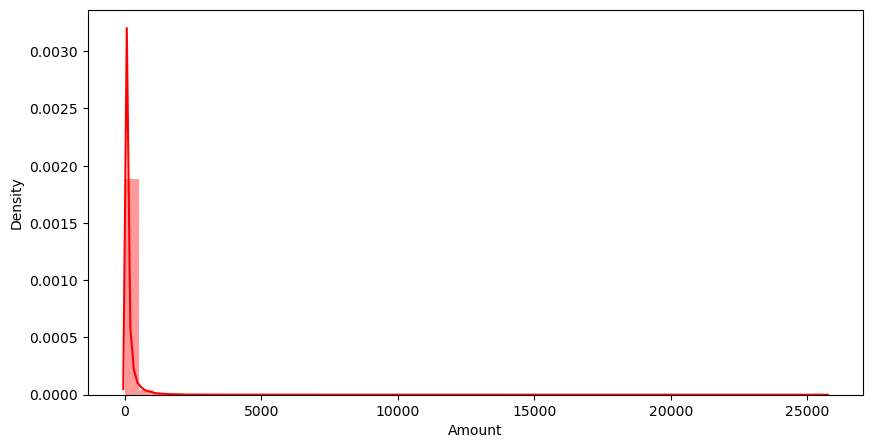

In [22]:
plt.figure(figsize=(10,5))
sns.distplot(raw_data['Amount'], color='r')

- standard scaler 적용

In [23]:
raw_data['Amount']

0         149.62
1           2.69
2         378.66
3         123.50
4          69.99
           ...  
284802      0.77
284803     24.79
284804     67.88
284805     10.00
284806    217.00
Name: Amount, Length: 284807, dtype: float64

In [24]:
raw_data['Amount'].values

array([149.62,   2.69, 378.66, ...,  67.88,  10.  , 217.  ])

In [25]:
raw_data['Amount'].values.shape

(284807,)

- 여기서 (284807,1)로 나오길 원함. 그래서 reshape(-1,1)을 해줌
- -1은 그대로 라는 뜻

In [26]:
raw_data['Amount'].values.reshape(-1,1)

array([[149.62],
       [  2.69],
       [378.66],
       ...,
       [ 67.88],
       [ 10.  ],
       [217.  ]])

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
amount_n = scaler.fit_transform(raw_data['Amount'].values.reshape(-1,1))

raw_data_copy = raw_data.iloc[:, 1:-2]
raw_data_copy['Amount_Scaled'] = amount_n
raw_data_copy.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_Scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [28]:
# 데이터를 다시 나누고 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(raw_data_copy, y, test_size=0.3, random_state=13, stratify=y)

In [29]:
%%time

# 모델에 다시 평가를 해보면 

models = [lr_clf, dt_clf, rf_clf]
model_names = ['LogisticRegression', 'DecisionTree', 'RandomForest']

result = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

result

CPU times: user 5min 3s, sys: 2.49 s, total: 5min 5s
Wall time: 43.2 s


,Accuracy,Precision,Recall,F1,roc_auc
LogisticRegression,0.999169,0.888889,0.594595,0.712551,0.797233
DecisionTree,0.999345,0.883333,0.716216,0.791045,0.858026
RandomForest,0.999497,0.956522,0.743243,0.836502,0.871592


- 별 변화가 없다

- 두번째 도전
- roc curve를 그려보자

In [30]:
from sklearn.metrics import roc_curve

def draw_roc_curve(models, model_names, X_test, y_test):
    plt.figure(figsize=(10,10))

    for model in range(len(models)):
        pred = models[model].predict_proba(X_test)[:,1]
        fpr, tpr, thresholds = roc_curve(y_test, pred)
        plt.plot(fpr, tpr, label=model_names[model])

    plt.plot([0,1], [0,1], 'k--', label='random guess')
    plt.title('ROC')
    plt.legend()
    plt.grid()
    plt.show();

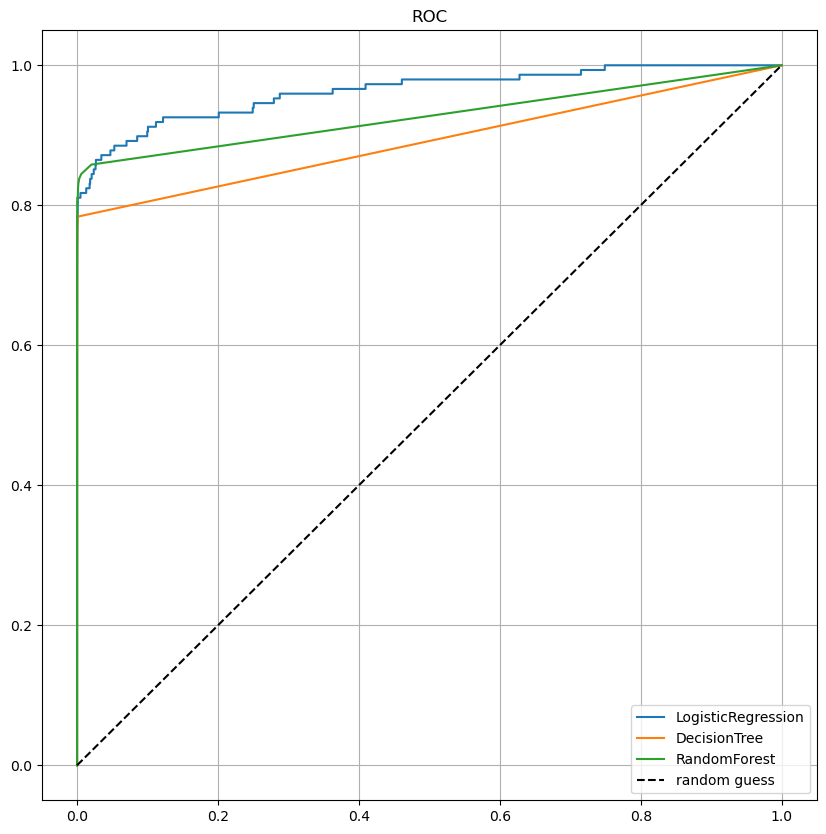

In [31]:
draw_roc_curve(models, model_names, X_test, y_test)

- 세번째 도전
- 특이데이터

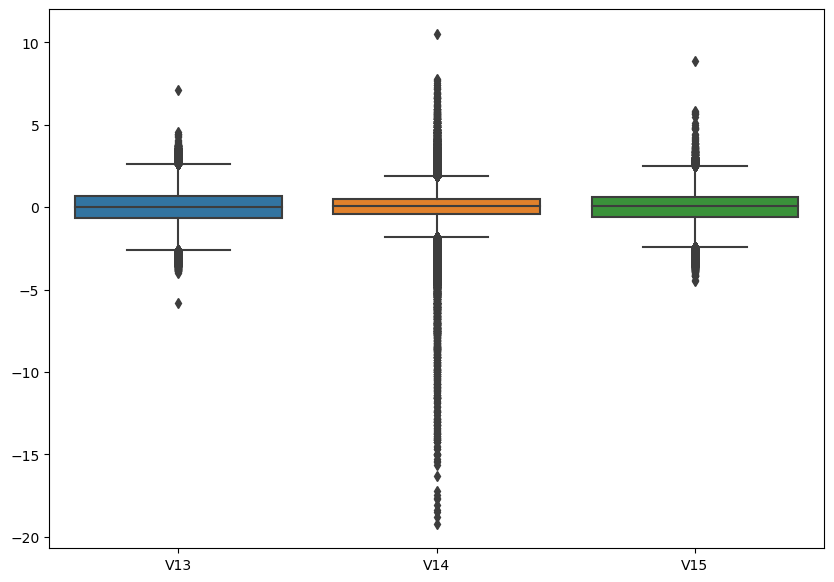

In [32]:
plt.figure(figsize=(10,7))
sns.boxplot(data=raw_data[['V13', 'V14', 'V15']]);

- outlier를 정리하기 위해 outlier의 인덱스를 파악하는 코드

In [33]:
def get_outlier(df=None, column=None, weight=1.5):
    fraud = df[df['Class']==1][column]

    quantile_25 = np.percentile(fraud.values,25) #q1
    quantile_75 = np.percentile(fraud.values,75) #q3

    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight

    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight

    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index

    return outlier_index

- outlier 찾기

In [34]:
get_outlier(df=raw_data, column='V14')

Int64Index([8296, 8615, 9035, 9252], dtype='int64')

- outlier 제거

In [35]:
outlier_index = get_outlier(df=raw_data, column='V14')
raw_data_copy.drop(outlier_index, axis=0, inplace=True)
raw_data_copy.shape

(284803, 29)

- outlier를 제거하고 데이터 나누기

In [36]:
X = raw_data_copy

# raw_data_copy에는 y가 없어서 raw_data에서 outlier를 제거하고 y를 잡아줌
raw_data.drop(outlier_index, axis=0, inplace=True)
y = raw_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13, stratify=y)


In [37]:
%%time 

models = [lr_clf, dt_clf, rf_clf]
model_names = ['LogisticRegression', 'DecisionTree', 'RandomForest']

result = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

result

CPU times: user 4min 48s, sys: 2.24 s, total: 4min 50s
Wall time: 41.5 s


,Accuracy,Precision,Recall,F1,roc_auc
LogisticRegression,0.999286,0.904762,0.650685,0.756972,0.825284
DecisionTree,0.999427,0.870229,0.780822,0.823105,0.890311
RandomForest,0.999497,0.918699,0.773973,0.840149,0.886928


- roc curve 확인

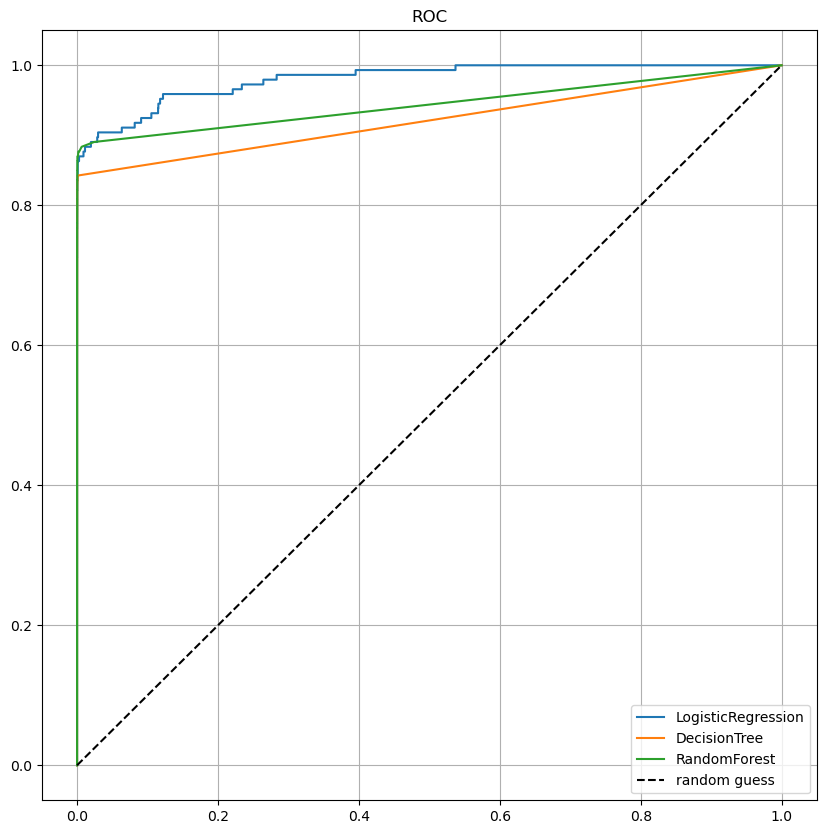

In [38]:
draw_roc_curve(models, model_names, X_test, y_test)

- 좀 더 좋아진 것 같다

- 네번째 시도

In [39]:
# !pip install imbalanced-learn
# 얘도 혹시 몰라 지우고 conda로 다시 설치해줌

- SMOTE 적용

- 원칙적으로 스케일러를 제외한 모든 행동은 train데이터에 한해서만 해야한다.
- test 데이터에 하면 제대로 된 결과가 나오지 않을 수 있다
- 스케일러만 전체 데이터에 적용 후 train, test로 나눈 후 train데이터에 학습시켜야 한다
- 데이터를 불리는 것도 마찬가지(oversampling, undersampling)

In [40]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=13)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [41]:
X_train.shape, y_train.shape

In [43]:
X_train_over.shape, y_train_over.shape

In [46]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_train_over, return_counts=True))


In [45]:
%%time 

models = [lr_clf, dt_clf, rf_clf]
model_names = ['LogisticRegression', 'DecisionTree', 'RandomForest']

result = get_result_pd(models, model_names, X_train_over, y_train_over, X_test, y_test)

result

In [47]:
roc curve

draw_roc_curve(models, model_names, X_test, y_test)